In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns  # Imorting Seaborn library
import os
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
#, r2_score


df=pd.read_csv('Group16_ClassificationData.csv')
df.head()
df.tail()
y=df.Outcome
x = df.drop(["Outcome"], axis=1) 
x.info()
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

clf = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf.fit(x_train, y_train)

y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)


Acc_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy for LDA Model: ", Acc_train)

Acc_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy for LDA Model: ", Acc_test)

Training Accuracy for LDA Model:  0.7736156351791531
Testing Accuracy for LDA Model:  0.7987012987012987


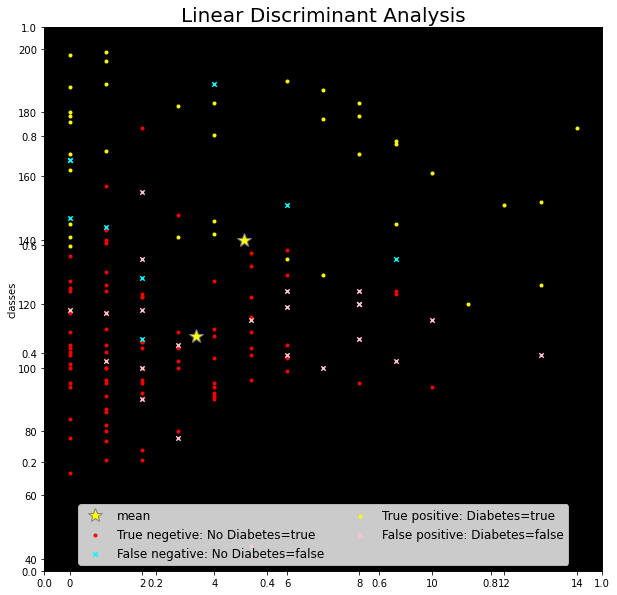

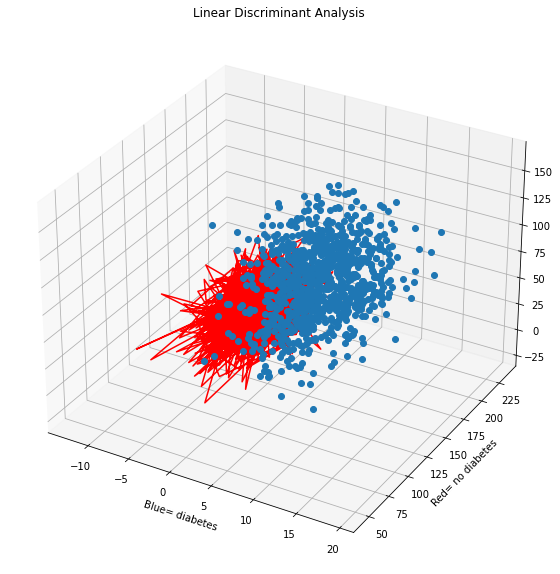

Text(0.5, 0.98, 'Linear Discriminant Analysis')

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy import linalg
import matplotlib as mpl

# Plot functions
def plot_data(lda, X, y, y_pred):
    splot = plt.figure(figsize=(10, 10))
    plt.title("Linear Discriminant Analysis", fontsize=20)
    plt.ylabel("classes")
    ax = plt.axes()
    ax.set_facecolor('black')

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], marker=".", color="red", label="True negetive: No Diabetes=true")
    plt.scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], marker="x", s=20, color="cyan", label="False negative: No Diabetes=false") 

    # class 1: dots
    plt.scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], marker=".", color="yellow",label="True positive: Diabetes=true")
    plt.scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], marker="x", s=20, color="pink",label="False positive: Diabetes=false")    

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",label="mean"
    )
    leg = ax.legend(loc='lower center', ncol=2, fontsize=12)
    
    fig=plt.figure(figsize=(10,10))
    ax=plt.axes(projection="3d")
    x_test_cov=np.cov(X0_tp.T) 
    x_test_mean= X0_tp.mean(axis=0)
     
    x1, y1 ,z1, x2, y2, z2, x3, y3= np.random.multivariate_normal(x_test_mean.T, x_test_cov, 1000).T
    
    x1_test_cov=np.cov(X1_tp.T) 
    x1_test_mean= X1_tp.mean(axis=0)
     
    x4, y4 ,z4, x5, y5, z5, x6, y6= np.random.multivariate_normal(x1_test_mean.T, x1_test_cov, 1000).T

    plt.plot(x1, y1,z1, 'r')
    plt.plot(x4, y4,z4, 'o')
    #plt.axis('equal')
    plt.title("Linear Discriminant Analysis")
    plt.ylabel("Red= no diabetes")
    plt.xlabel("Blue= diabetes")
    plt.show()


    return splot


splot=plot_data(clf, x_test, y_test, y_pred_test)
#plt.figure(figsize=(20, 20), facecolor="black")
plt.suptitle("Linear Discriminant Analysis",y=0.98,fontsize=15,)


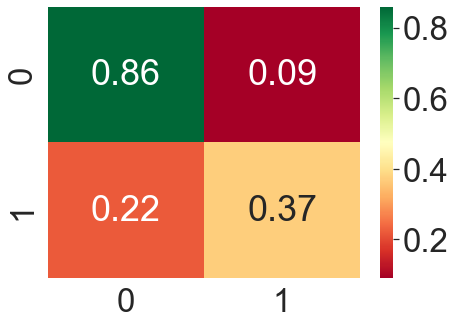

In [ ]:
# plotting correlation heatmap
plt.figure(figsize = (7,5))
sns.set(font_scale=3.0)
dataplot=sns.heatmap(confusion_matrix(y_test, y_pred_test)/100,annot=True, fmt='.2f', cmap='RdYlGn')
  